## Graphs using MySQL
### Task 3
Create a visualization that provides a salaries paid between the male and female employees working in the company each year, starting from 1990.

## Here was the SQL code

SELECT
	
    e.gender,
    
    d.dept_name,
	
    ROUND(AVG(s.salary)) AS salary,
    
    YEAR(s.from_date) AS calendar_year
    
    FROM
	
        t_salaries s
        
        JOIN
        
        t_employees e ON s.emp_no = e.emp_no
        
        JOIN
        
        t_dept_emp de ON de.emp_no = e.emp_no
        
        JOIN
        
        t_departments d ON d.dept_no = de.dept_no
	
    GROUP BY d.dept_no, e.gender, calendar_year
    
    HAVING calendar_year <= 2002
    
    ORDER BY d.dept_no;

In [1]:
# Import the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

## EDA

Let's look at our csv data file

In [2]:
df = pd.read_csv("task_3.csv")
df.head(10)

,gender,dept_name,salary,calendar_year
0,M,Marketing,58896,1990
1,M,Marketing,59233,1991
2,M,Marketing,59743,1992
3,M,Marketing,60437,1993
4,M,Marketing,64548,1994
5,M,Marketing,65377,1995
6,M,Marketing,66468,1996
7,M,Marketing,67253,1997
8,M,Marketing,66333,1998
9,M,Marketing,67595,1999


### Sort DataFrame by calendar_year

In [3]:
df.sort_values(by=["calendar_year"], inplace=True, ascending=True)
df.calendar_year.head()

0      1990
195    1990
39     1990
52     1990
169    1990
Name: calendar_year, dtype: int64

## Make a copy of the original dataframe

In [4]:
df_tmp = df.copy()
df_tmp.head()

,gender,dept_name,salary,calendar_year
0,M,Marketing,58896,1990
195,F,Research,47006,1990
39,F,Finance,56502,1990
52,M,Human Resources,40998,1990
169,F,Sales,67449,1990


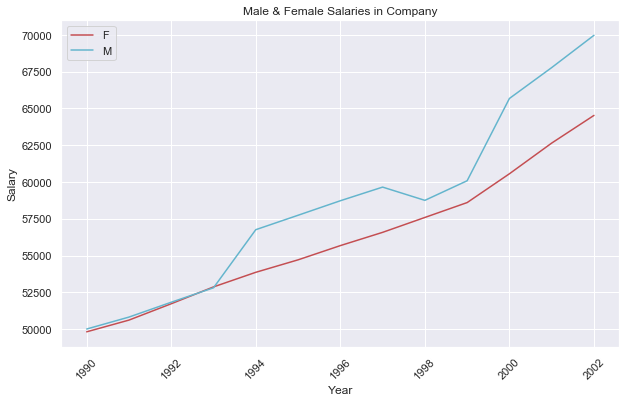

In [6]:
sns.set()
df2 = df_tmp.pivot_table(
    index=['calendar_year'],
    columns=['gender'])

ax = df2.plot.line(figsize=(12,6), color = 'rc')
ax.legend(labels=df2.columns.levels[1])
ax.set_xlabel('Year')
ax.set_ylabel('Salary')
ax.set_title('Male & Female Salaries in Company')

x_offset = -.3
y_offset = -.3

for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

plt.xticks(rotation = 45)
plt.show();

In [7]:
df_tmp.tail(10)

,gender,dept_name,salary,calendar_year
103,F,Production,60468,2002
90,M,Production,65609,2002
77,F,Human Resources,56502,2002
64,M,Human Resources,61449,2002
51,F,Finance,70989,2002
38,M,Finance,76027,2002
25,F,Marketing,71984,2002
12,M,Marketing,77525,2002
207,F,Research,60821,2002
233,F,Customer Service,60589,2002
